##### Creation of a classification model for various paintings to identify the genre, in the dataset as the "TYPE" column, of the painting. <br> I will be using a Multinomial Logistic Regression Neural Network and an Agglomerative Clustering Model. #####

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
import os
from keras.src.legacy.preprocessing.image import ImageDataGenerator

In [2]:
paint = pd.read_csv("paint_data_labels.csv", sep="\t")
paint.head()

,ID,FILE,AUTHOR,BORN-DIED,TITLE,DATE,TECHNIQUE,LOCATION,FORM,TYPE,SCHOOL,TIMELINE,URL
0,4,4.jpg,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)",Portrait of Emperor Rudolf II,1590s,"Oil on canvas, 60 x 48 cm","Kunsthistorisches Museum, Vienna",painting,portrait,German,1601-1650,http://www.wga.hu/html/a/aachen/rudolf2.html
1,5,5.jpg,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)",Self-Portrait with a Glass of Wine,c. 1596,"Oil on canvas, 53 x 44 cm",Private collection,painting,portrait,German,1601-1650,http://www.wga.hu/html/a/aachen/selfport.html
2,6,6.jpg,"AAGAARD, Carl Frederik","(b. 1833, Odense, d. 1895, København)",Deer beside a Lake,1888,"Oil on canvas, 53 x 82 cm",Private collection,painting,landscape,Danish,1851-1900,http://www.wga.hu/html/a/aagaard/deerlake.html
3,7,7.jpg,"AAGAARD, Carl Frederik","(b. 1833, Odense, d. 1895, København)",The Rose Garden,1877,"Oil on canvas, 98 x 80 cm",Private collection,painting,landscape,Danish,1851-1900,http://www.wga.hu/html/a/aagaard/rosegard.html
4,15,15.jpg,"ABBATE, Niccolò dell'","(b. 1509, Modena, d. 1571, Fontainebleau)",Stag Hunt,1550-52,"Oil on canvas, 116 x 159 cm","Galleria Borghese, Rome",painting,landscape,Italian,1501-1550,http://www.wga.hu/html/a/abbate/deerhunt.html


In [3]:
paint["TYPE"].value_counts()

TYPE
portrait      5640
landscape     4342
still-life    1400
Name: count, dtype: int64

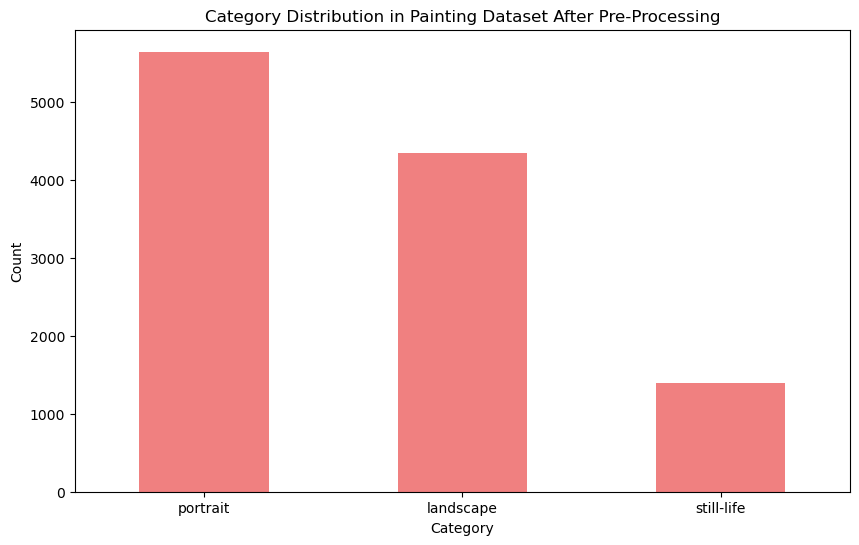

In [4]:
paint_counts = paint['TYPE'].value_counts()
plt.figure(figsize=(10, 6))
paint_counts.plot(kind='bar', color='lightcoral')
plt.title('Category Distribution in Painting Dataset After Pre-Processing')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=360)
plt.show()

Splitting dataset into training and testing sets - no need to rerun

In [5]:
# import os
# import pandas as pd
# from sklearn.model_selection import train_test_split
# import shutil

# csv_file_path = "paint_data_labels.csv"  # path to copy of labels 
# image_folder = "paint_data/"  # path to folder of images
# testing_image_folder = "paint_test/test_images/"  # path to folder where test images will be stored
# training_image_folder = "paint_train/train_images/"  # path to folder where training images will be stored
# testing_label_file = "paint_test/test_labels.csv"  # path to test labels
# training_label_file = "paint_train/train_labels.csv"  # path to train labels

# os.makedirs(testing_image_folder, exist_ok=True)
# os.makedirs(training_image_folder, exist_ok=True)

# data = pd.read_csv(csv_file_path, sep="\t")
# data = data.sort_values(by='ID').reset_index(drop=True)

# train_set, test_set = train_test_split(
#     data,
#     test_size=0.2,
#     stratify=data['TYPE'],
#     random_state=42
# )

# train_set = train_set.sort_values(by='ID').reset_index(drop=True)
# test_set = test_set.sort_values(by='ID').reset_index(drop=True)

# def move_images(data_subset, target_folder):
#     for _, row in data_subset.iterrows():
#         file_name = row['FILE']
#         if pd.notna(file_name):
#             src_path = os.path.join(image_folder, file_name)
#             dest_path = os.path.join(target_folder, file_name)
#             if os.path.exists(src_path):
#                 shutil.move(src_path, dest_path)
#                 print(f"Moved file: {file_name} from {src_path} to {dest_path}")
#             else:
#                 print(f"File not found: {file_name} (Skipping)")

# print("\nMoving images to training set...")
# move_images(train_set, training_image_folder)
# print("\nMoving images to testing set...")
# move_images(test_set, testing_image_folder)

# train_set.to_csv(training_label_file, sep="\t", index=False)
# test_set.to_csv(testing_label_file, sep="\t", index=False)

# print(f"\nTraining set: {len(train_set)} samples, images moved to {training_image_folder}")
# print(f"Testing set: {len(test_set)} samples, images moved to {testing_image_folder}")

In [6]:
train = pd.read_csv("paint_train\\train_labels.csv", sep = '\t')
train["TYPE"].value_counts()

TYPE
portrait      4512
landscape     3473
still-life    1120
Name: count, dtype: int64

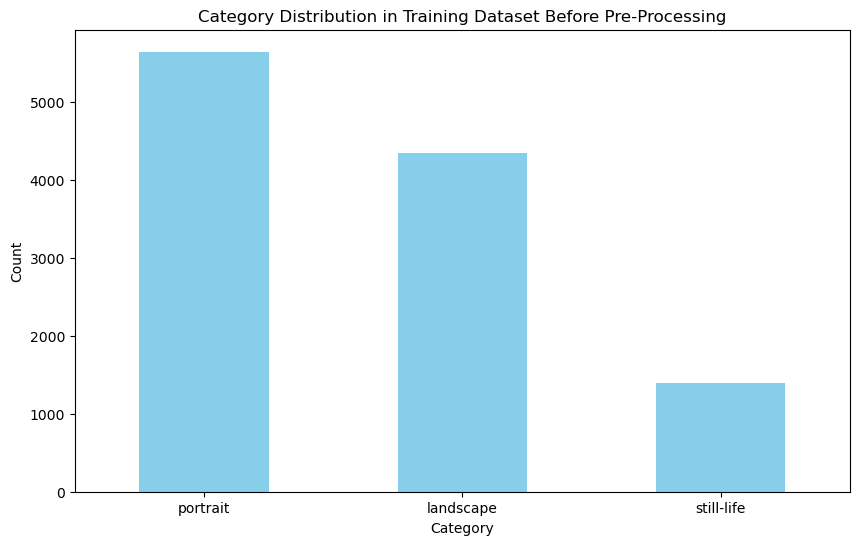

In [7]:
paint_counts = paint['TYPE'].value_counts()
plt.figure(figsize=(10, 6))
paint_counts.plot(kind='bar', color='skyblue')
plt.title('Category Distribution in Training Dataset Before Pre-Processing')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=360)
plt.show()

In [8]:
test = pd.read_csv("paint_test\\test_labels.csv", sep = '\t')
test["TYPE"].value_counts()

TYPE
portrait      1128
landscape      869
still-life     280
Name: count, dtype: int64

Fixing data imbalance through data augmentation - Only needed on the training set & no need to rerun

In [9]:
# Data Augmentation - augmenting the landscape type to increase the number of examples

# import tensorflow as tf
# import os
# from keras.src.legacy.preprocessing.image import ImageDataGenerator
# load_img = tf.keras.utils.load_img
# img_to_array = tf.keras.utils.img_to_array
# save_img = tf.keras.utils.save_img
# array_to_img = tf.keras.utils.array_to_img

# aug_labels = 'paint_train/aug_labels.csv'
# aug_image = 'paint_train/aug_images/'
# data = pd.read_csv(aug_labels, sep='\t')
# new_images = []

# still_life_data = data[data['TYPE'] == 'still-life']

# # provides options to augment images
# augmentor = ImageDataGenerator(
#     rotation_range=30,
#     horizontal_flip=True,
#     vertical_flip=True,
#     fill_mode='nearest'
# )

# current_max_id = data['ID'].max()
# next_id = current_max_id + 1

# augmented_count = 0

# for _, row in still_life_data.iterrows():
#     if augmented_count >= 1120:
#         break 

#     image_path = os.path.join(aug_image, row['FILE'])
#     try:
#         img = load_img(image_path)
#         img_array = img_to_array(img)
#         img_array = img_array.reshape((1,) + img_array.shape)

#         # augments image
#         for batch in augmentor.flow(img_array, batch_size=1):
#             # saves changed file
#             new_file = f"{next_id}.jpg"
#             new_image_path = os.path.join(aug_image, new_file)
#             save_img(new_image_path, array_to_img(batch[0]))

#             # adds new row in label file
#             new_row = row.copy()
#             new_row['ID'] = next_id
#             new_row['FILE'] = new_file
#             new_images.append(new_row)

#             next_id += 1
#             augmented_count += 1
#             break
        
#     except Exception as e:
#         print(f"Error processing image {row['FILE']}: {e}")

# # add new rows to label dataframe
# data = pd.concat([data, pd.DataFrame(new_images)], ignore_index=True)

# # save updated dataframe into file
# data.to_csv(aug_labels, sep='\t', index=False)

# print("Augmentation complete and labels updated.")

In [10]:
train = pd.read_csv("paint_train\\aug_labels.csv", sep = '\t')
train["TYPE"].value_counts()
# After running: 
#   TYPE
#   portrait      4512
#   landscape     3473
#   still-life    2240
# While the distribution is nowhere near perfect, it is still better than the previous split
# I will rerun it only on the original images and not on the already augmented images. This will bring the total images to 3360 
# which will make it more balanced. 
# After re-running: 
#   TYPE
#   portrait      4512
#   landscape     3473
#   still-life    3360

TYPE
portrait      4512
landscape     3472
still-life    3360
Name: count, dtype: int64

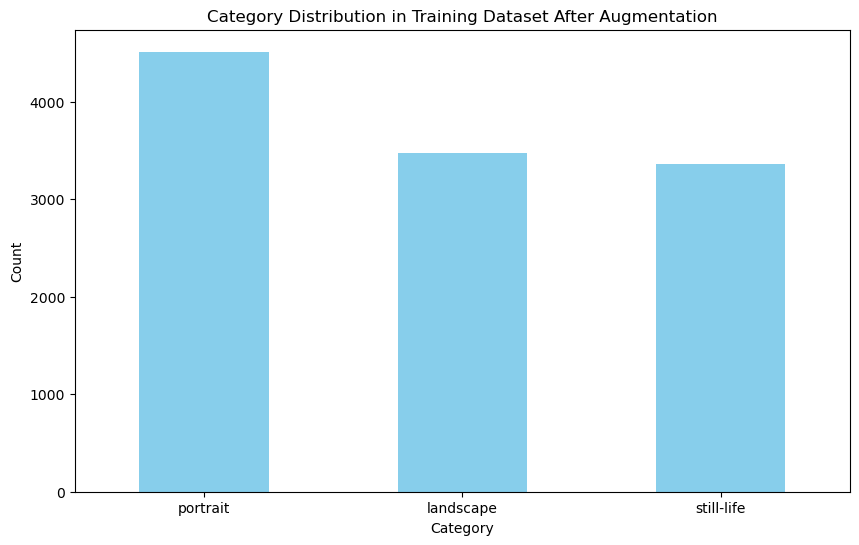

In [11]:
paint_counts = train['TYPE'].value_counts()
plt.figure(figsize=(10, 6))
paint_counts.plot(kind='bar', color='skyblue')
plt.title('Category Distribution in Training Dataset After Augmentation')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=360)
plt.show()

In [12]:
# Making data computer-readable - changing image sizing & greyscaling

# load_img = tf.keras.utils.load_img
# img_to_array = tf.keras.utils.img_to_array
# save_img = tf.keras.utils.save_img

# labels_file = 'paint_train/train_labels.csv'
# data = pd.read_csv(labels_file, sep='\t')
# image_folder = 'paint_train/train_images/'
# processed_images_folder = 'paint_train/processed_images/'
# processed_labels_file = 'paint_train/img_train_labels.csv'
# os.makedirs(processed_images_folder, exist_ok=True)

# new_images = []
# target_size = (256, 256)
# color = 'grayscale'
# current_id = data['ID'].min()

# for _, row in data.iterrows():
#     image_path = os.path.join(image_folder, row['FILE'])
#     try:
#         img = load_img(image_path, target_size=target_size, color_mode=color)
#         img_array = img_to_array(img)
#         new_file = f"{current_id}.jpg"
#         new_image_path = os.path.join(processed_images_folder, new_file)
#         save_img(new_image_path, img_array)

#         new_row = row.copy()
#         new_row['ID'] = current_id
#         new_row['FILE'] = new_file
#         new_images.append(new_row)
#         current_id += 1

#     except Exception as e:
#         print(f"Error processing image {row['FILE']}: {e}")

# if new_images:
#     processed_data = pd.DataFrame(new_images)
#     processed_data.to_csv(processed_labels_file, sep='\t', index=False)

# print("Image processing complete. Images resized to target size and converted to grayscale.")

Creation of the models

Multinomial Logistic Regression NN:

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Softmax
from tensorflow.keras.utils import to_categorical

load_img = tf.keras.utils.load_img
img_to_array = tf.keras.utils.img_to_array

labels_data = pd.read_csv('paint_train/aug_labels.csv', sep='\t')
labels = labels_data['TYPE'].astype('category')
train_labels_encoded = labels.cat.codes
num_classes = len(labels.cat.categories)
train_labels_one_hot = to_categorical(train_labels_encoded, num_classes=num_classes)

image_size = (256, 256)
train_images = []

for file in labels_data['FILE']:
    image_path = os.path.join('paint_train/aug_images/', file)
    try:
        img = load_img(image_path, target_size=image_size, color_mode='grayscale')
        img_array = img_to_array(img) / 255.0
        train_images.append(img_array)
    except Exception as e:
        print(f"Error loading image {file}: {e}")

train_images = np.array(train_images)

In [14]:
test_labels_data = pd.read_csv('paint_test/test_labels.csv', sep='\t')
test_labels = test_labels_data['TYPE'].astype('category')
test_labels_encoded = test_labels.astype('category').cat.codes
test_labels_one_hot = to_categorical(test_labels_encoded, num_classes=num_classes)

test_images = []
for file in test_labels_data['FILE']:
    image_path = os.path.join('paint_test/test_images/', file)
    try:
        img = load_img(image_path, target_size=image_size, color_mode='grayscale')
        img_array = img_to_array(img) / 255.0
        test_images.append(img_array)
    except Exception as e:
        print(f"Error loading image {file}: {e}")

test_images = np.array(test_images)


In [15]:
print(f"Train Labels Shape: {train_labels_one_hot.shape}")
print(f"Test Labels Shape: {test_labels_one_hot.shape}")

Train Labels Shape: (11344, 3)
Test Labels Shape: (2277, 3)


In [16]:
print(f"Train Labels Original Length: {len(labels)}")
print(f"Train Images Shape: {train_images.shape}")

print(f"Test Labels Original Length: {len(test_labels)}")
print(f"Test Images Shape: {test_images.shape}")

Train Labels Original Length: 11344
Train Images Shape: (11344, 256, 256, 1)
Test Labels Original Length: 2277
Test Images Shape: (2277, 256, 256, 1)


In [33]:
# build and compile model
from tensorflow.keras.layers import Input, Dense, Flatten

model = tf.keras.Sequential([
    Input(shape=(256, 256, 1)),
    Flatten(),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
# train the model
model.fit(train_images, train_labels_one_hot, epochs=25, batch_size=32, validation_split=0.1)

# evaluate model on test data
loss, accuracy = model.evaluate(test_images, test_labels_one_hot)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# tests in order for confusion matrix refernce: 
# epochs=25, batch_size=64
# epochs=25, batch_size=32
# epochs=32, batch_size=16
# epochs=25, batch_size=32

Epoch 1/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7824 - loss: 1.1880 - val_accuracy: 0.1586 - val_loss: 4.7193
Epoch 2/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8027 - loss: 0.7878 - val_accuracy: 0.0626 - val_loss: 9.4677
Epoch 3/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8376 - loss: 0.5506 - val_accuracy: 0.2749 - val_loss: 3.4849
Epoch 4/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8076 - loss: 0.7581 - val_accuracy: 0.2106 - val_loss: 4.0076
Epoch 5/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7964 - loss: 0.8628 - val_accuracy: 0.1392 - val_loss: 7.1608
Epoch 6/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7136 - loss: 2.4189 - val_accuracy: 0.0361 - val_loss: 14.2772
Epoch 7/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7843 - loss: 1.3548 - val_accuracy: 0.0326 - val_loss: 12.1843
Epoch 8/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7953 - loss: 1.0692 - val_accuracy: 

Evaluation for LRNN

In [23]:
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
predicted_labels_df = pd.DataFrame({
    'Predicted Label': predicted_classes
})
predicted_labels_df.to_csv('LRNN/predicted_labels.csv', index=False)

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [24]:
pred = pd.read_csv('LRNN/predicted_labels.csv')
pred["Predicted Label"].value_counts()

Predicted Label
1    1640
0     552
2      85
Name: count, dtype: int64

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification report saved as LRNN/final_classification_report.csv
Classification Report:

              precision    recall  f1-score   support

   landscape       0.81      0.31      0.45       869
    portrait       0.58      0.83      0.68      1128
  still-life       0.30      0.35      0.32       280

    accuracy                           0.57      2277
   macro avg       0.56      0.50      0.49      2277
weighted avg       0.63      0.57      0.55      2277



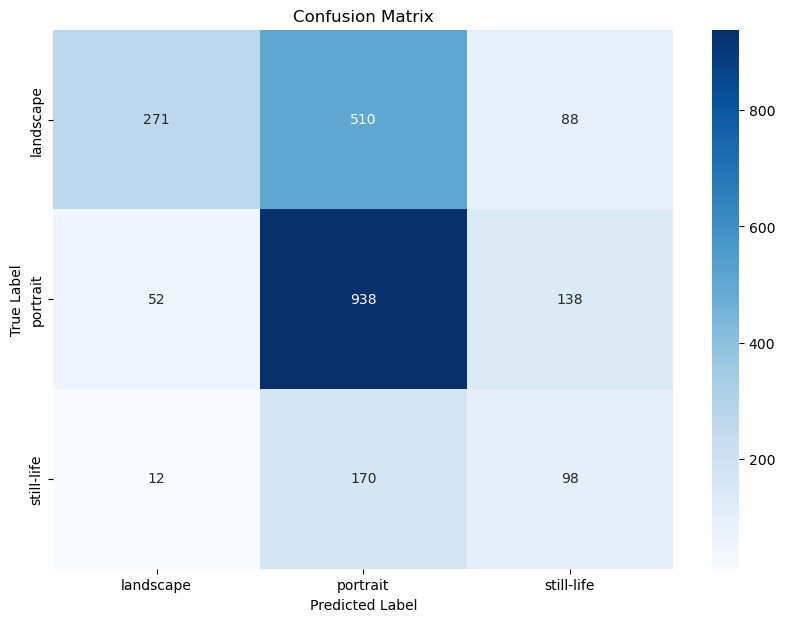

Confusion matrix saved as LRNN/final_confusion_matrix_12122024_001436.png


In [39]:
# -- CLASSIFICATION REPORT --
from datetime import datetime

# Predict test set
category_names = test_labels.cat.categories

y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)

y_pred_categories = category_names[y_pred_classes]
y_true_categories = category_names[test_labels_encoded]

# Generate classification report as a dictionary
report_dict = classification_report(y_true_categories, y_pred_categories, output_dict=True)

# Save Classification report
report_df = pd.DataFrame(report_dict).transpose()
timestamp = datetime.now().strftime("%d%m%Y_%H%M%S")
report_df['Timestamp'] = timestamp
classification_report_filename = 'LRNN/final_classification_report.csv'

if os.path.exists(classification_report_filename):
    existing_report_df = pd.read_csv(classification_report_filename, index_col=0)
    combined_report_df = pd.concat([existing_report_df, report_df], axis=0)
else:
    combined_report_df = report_df

combined_report_df.to_csv(classification_report_filename)

print(f'Classification report saved as {classification_report_filename}')

print("Classification Report:\n")
print(classification_report(y_true_categories, y_pred_categories))

# -- CONFUSION MATRIX --

cm = confusion_matrix(y_true_categories, y_pred_categories)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=category_names, yticklabels=category_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

confusion_matrix_filename = f'LRNN/final_confusion_matrix_{timestamp}.png'
plt.savefig(confusion_matrix_filename)
plt.show()
print(f'Confusion matrix saved as {confusion_matrix_filename}')

Decision Tree Classifier:

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

train_images_flat = train_images.reshape((train_images.shape[0], -1))
test_images_flat = test_images.reshape((test_images.shape[0], -1))

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(train_images_flat, train_labels_encoded)

test_predictions = decision_tree.predict(test_images_flat)

Evaluation for Decision Tree:

Confusion Matrix:
[[568 174 127]
 [141 726 261]
 [ 39 112 129]]


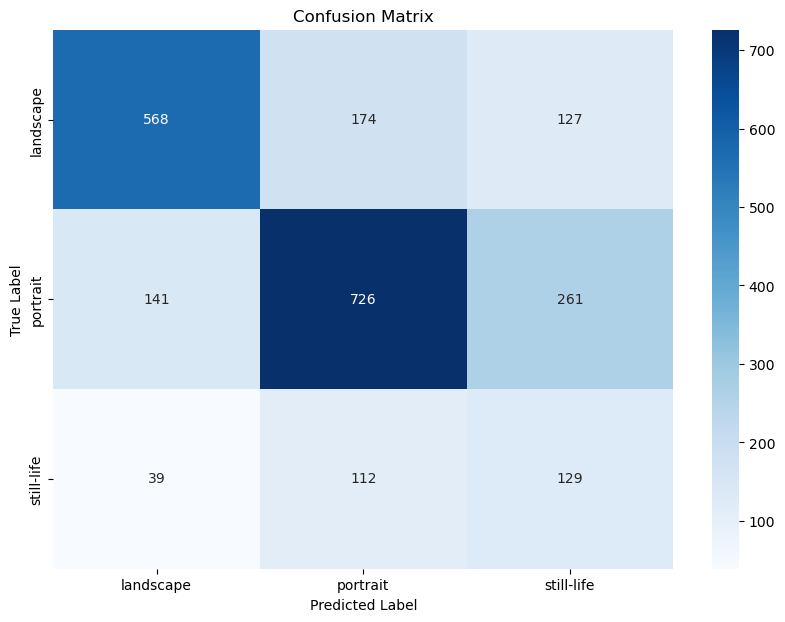

Confusion matrix saved as DTC/final_confusion_matrix_12122024_001436.png

Classification Report:
              precision    recall  f1-score   support

   landscape       0.76      0.65      0.70       869
    portrait       0.72      0.64      0.68      1128
  still-life       0.25      0.46      0.32       280

    accuracy                           0.62      2277
   macro avg       0.58      0.59      0.57      2277
weighted avg       0.68      0.62      0.64      2277



In [44]:
# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(test_labels_encoded, test_predictions))
dt = confusion_matrix(test_labels_encoded, test_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(dt, annot=True, fmt='d', cmap='Blues', xticklabels=category_names, yticklabels=category_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

confusion_matrix_filename = f'DTC/final_confusion_matrix_{timestamp}.png'
plt.savefig(confusion_matrix_filename)
plt.show()
print(f'Confusion matrix saved as {confusion_matrix_filename}')

print("\nClassification Report:")
print(classification_report(test_labels_encoded, test_predictions, target_names=labels.cat.categories))


End